In [1]:
#lmfit provides curve fiting using non-linear least squares minimization
#lmfit was developed by Matt Newville: https://github.com/newville

#install lmfit

#uncomment the following lines to install lmfit

# from subprocess import call
# call(['pip', 'install', 'lmfit'])
# call(['pip', 'install', 'matplotlib'])

#import libraries
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit.models import GaussianModel, VoigtModel, LorentzianModel, PseudoVoigtModel, MoffatModel, StudentsTModel
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import matplotlib.lines as mlines
import scipy.signal
import matplotlib.lines as mlines

%matplotlib inline

In [2]:
#Load the data

#to get a better measure of the center, the data was split and loaded into chunks
#each peak of interest was fit individually and the whole spectrum plotted on a single graph

#The data was cleaned and prepared using external spreadsheet applications
#The data includes estimated errors based on instruments' accuracy


data1 = loadtxt('./Data/s1.csv')
x1 = data1[:, 0]
y1 = data1[:, 1]
yerr1 = data1[:, 2]

#-------------------------------

data2 = loadtxt('./Data/s2.csv')
x2 = data2[:, 0]
y2 = data2[:, 1]
yerr2 = data2[:, 2]

#-------------------------------

data3 = loadtxt('./Data/s3.csv')
x3 = data3[:, 0]
y3 = data3[:, 1]
yerr3 = data3[:, 2]

#-------------------------------

data4 = loadtxt('./Data/s4.csv')
x4 = data4[:, 0]
y4 = data4[:, 1]
yerr4 = data4[:, 2]

#-------------------------------

data5 = loadtxt('./Data/s5.csv')
x5 = data5[:, 0]
y5 = data5[:, 1]
yerr5 = data5[:, 2]

#-------------------------------

data6 = loadtxt('./Data/s6.csv')
x6 = data6[:, 0]
y6 = data6[:, 1]
yerr6 = data6[:, 2]

#-------------------------------

data7 = loadtxt('./Data/s7.csv')
x7 = data7[:, 0]
y7 = data7[:, 1]
yerr7 = data7[:, 2]


In [3]:
#define the fit for each peak using builtin models
#the suffixes (2, 4, 6) indicate the data chunk they are fiiting
#specify an alias(prefix) for each model:

mod2 = MoffatModel(prefix='g2_')
mod4 = MoffatModel(prefix='g4_')
mod6 = MoffatModel(prefix='g6_')

In [4]:
#initialize the parameters to be optimized

pars2  = mod2.guess(y2, x=x2)#g2_amplitude=0.0093, g2_center=47.8, g2_sigma=1.088, g2_beta=1)
pars4  = mod4.guess(y4, x=x4)#g4_amplitude=0.0128, g4_center=74.95, g4_sigma=10.01, g4_beta=1)
pars6  = mod6.guess(y6, x=x6)#g6_amplitude=0.011994, g6_center=120.1133928, g6_sigma=1.27, g6_beta=1)

In [5]:
#fit with weights=1/yerr

result2 = mod2.fit(y2, pars2, x=x2, weights=1./yerr2)
result4 = mod4.fit(y4, pars4, x=x4, weights=1./yerr4)
result6 = mod6.fit(y6, pars6, x=x6, weights=1./yerr6)

In [6]:
#print the fit statistics and estimated parameters
print()
print('\033[1m' + "1st Peak")
print('\033[0m')
print(result2.fit_report())
print()
print('\033[1m' + "2nd Peak")
print('\033[0m')
print(result4.fit_report())
print()
print('\033[1m' + "3rd Peak")
print('\033[0m')
print(result6.fit_report())
print()


1st Peak

[[Model]]
    Model(moffat, prefix='g2_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 190
    # variables        = 4
    chi-square         = 189.449454
    reduced chi-square = 1.01854545
    Akaike info crit   = 7.44865445
    Bayesian info crit = 20.4367507
    R-squared          = -211916.131
[[Variables]]
    g2_amplitude:  0.01248919 +/- 2.5772e-04 (2.06%) (init = 0.57105)
    g2_center:     126.995557 +/- 1.27421847 (1.00%) (init = 127.7964)
    g2_sigma:      84.2746916 +/- 173.816861 (206.25%) (init = 38.07)
    g2_beta:       1.77307990 +/- 6.69254409 (377.45%) (init = 1)
    g2_fwhm:       116.573873 +/- 26.4240040 (22.67%) == '2*g2_sigma*sqrt(2**(1.0/max(1e-3, g2_beta))-1)'
    g2_height:     0.01248919 +/- 2.5772e-04 (2.06%) == 'g2_amplitude'
[[Correlations]] (unreported correlations are < 0.100)
    C(g2_sigma, g2_beta)      = +0.9996
    C(g2_amplitude, g2_sigma) = -0.5845
    C(g2_amplitude, g2_beta

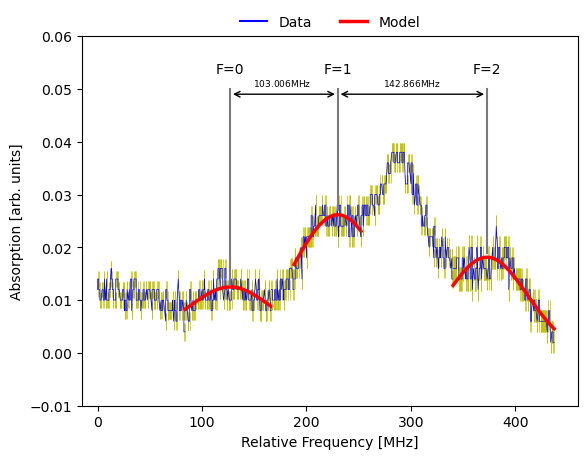

In [7]:
#plot data, model and errors

# Plot the data points with error bars in yellow ('y')
plt.errorbar(x1, y1, yerr=yerr1,fmt='none', ecolor='y', linewidth=0.5 )
# Plot the data points in blue ('b') with a thin line
plt.plot(x1, y1, 'b-', linewidth=0.5)

# Repeat the same for the second set of data (x2, y2)
plt.errorbar(x2, y2, yerr=yerr2,fmt='none', ecolor='y', linewidth=0.5 )
plt.plot(x2, y2, 'b-', linewidth=0.5)
# Plot the model (result2.best_fit) in red ('r') with a thicker line
plt.plot(x2, result2.best_fit, 'r-', linewidth=2.5)


# Repeat the above steps for the next four sets of data (x3, y3) to (x6, y6)
# Each set is plotted with error bars and blue data points, and the model is plotted in red
plt.errorbar(x3, y3, yerr=yerr3,fmt='none', ecolor='y', linewidth=0.5 )
plt.plot(x3, y3, 'b-', linewidth=0.5)

plt.errorbar(x4, y4, yerr=yerr4,fmt='none', ecolor='y', linewidth=0.5 )
plt.plot(x4, y4, 'b-', linewidth=0.5)
plt.plot(x4, result4.best_fit, 'r-', linewidth=2.5)

plt.errorbar(x5, y5, yerr=yerr5,fmt='none', ecolor='y', linewidth=0.5 )
plt.plot(x5, y5, 'b-', linewidth=0.5)

plt.errorbar(x6, y6, yerr=yerr6,fmt='none', ecolor='y', linewidth=0.5 )
plt.plot(x6, y6, 'b-', linewidth=0.5)
plt.plot(x6, result6.best_fit, 'r-', linewidth=2.5)

# Define a function 'annotate_dim' to annotate dimensions with arrows
def annotate_dim(ax,xyfrom,xyto,text='$248.013 \pm 0.895$'):
   ax.annotate("",xyfrom,xyto,arrowprops=dict(arrowstyle='<->'))   

# Define coordinates (xa, ya), (xb, yb), and (xc, yc) to create a gray line with arrows
# These coordinates are used to indicate the peak centers in the plot
xa, ya = [126.995112,126.995112], [0.013, 0.05]
xb, yb = [230.001078, 230.001078], [0.027, 0.05]
xc, yc = [372.867051, 372.867051], [0.019, 0.05]
plt.plot(xa, ya, xb, yb, xc, yc, color='#7a7a7a')

# Annotate dimensions between xa and xb, xb and xc with arrows and text
annotate_dim(plt.gca(),[126.995112, 0.049],[230.001078, 0.049])
plt.text(177, 0.0505, '$103.006$MHz',horizontalalignment="center", fontsize=6.5)

annotate_dim(plt.gca(),[230.001078, 0.049],[372.867051, 0.049])
plt.text(301, 0.0505, '$142.866$MHz', horizontalalignment="center", fontsize=6.5)

# Add text labels at peak centers in the plot
plt.text(372.867051, 0.05305, 'F=2',horizontalalignment="center", fontsize=10)
plt.text(230.001078, 0.05305, 'F=1',horizontalalignment="center", fontsize=10)
plt.text(126.995112, 0.05305, 'F=0',horizontalalignment="center", fontsize=10)

# Set the y-axis limits to (-0.01, 0.06) and x-axis limits to (-15, 460)
plt.ylim(-0.01, 0.06)
plt.xlim(-15, 460)

# Label the y-axis as 'Absorption [arb. units]' and the x-axis as 'Relative Frequency [MHz]'
plt.ylabel('Absorption [arb. units]')
plt.xlabel('Relative Frequency [MHz]')

# Create legend entries for the blue and red lines (data and model) and display the legend
blue_line = mlines.Line2D([], [], color='blue', label='Data')

red_line = mlines.Line2D([], [], color='red', label='Model', linewidth=2.5)

plt.legend([blue_line, red_line], ['Data', 'Model'], loc='lower center', bbox_to_anchor= (0.5, 1.005), ncol=2,
            borderaxespad=0, frameon=False)

#Show the plot
plt.show()